# **1. Importing Librabries**

**Importing necessary libraries for data manipulation, visualization, and SQL operations**

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# **2. Load and Clean the Data**

**This function loads the dataset, cleans unnecessary columns, handles missing values, and normalizes transaction types**

In [2]:
def load_and_clean_data():
    drive.mount('/content/drive')
    file_path = '/content/drive/My Drive/fraud_detection/Financial_datasets.csv'
    df = pd.read_csv(file_path)
    print("Initial Data Info:")
    print(df.info())
    df = df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1)
    df = df.dropna()
    df['type'] = df['type'].str.lower().str.strip()

    return df

# **3. Data Visualization**

**This function visualizes transaction distribution and fraud vs non-fraud transactions**

In [3]:
def visualize_data(df):
    # transaction distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x='type', data=df, palette='viridis', order=df['type'].value_counts().index)
    plt.title('Transaction Type Distribution')
    plt.xticks(rotation=45)
    plt.show()

    #fraud vs non-fraud transactions
    plt.figure(figsize=(10, 6))
    sns.countplot(x='isFraud', data=df, palette='coolwarm')
    plt.title('Fraud vs Non-Fraud Transactions')
    plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
    plt.show()

    # transaction amount distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['amount'], bins=50, kde=True, color='blue')
    plt.title('Transaction Amount Distribution')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.show()

    # fraud percentage by transaction type
    fraud_percentage = df[df['isFraud'] == 1]['type'].value_counts(normalize=True) * 100
    fraud_percentage.plot(kind='bar', figsize=(10, 6), color='orange')
    plt.title('Fraud Percentage by Transaction Type')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.show()


# **4. SQL Analysis**

**This function performs SQL queries to analyze high-value transactions and fraud distribution by transaction type..**

In [4]:
def analyze_data_with_sql(df):
    conn = sqlite3.connect(':memory:')
    df.to_sql('transactions', conn, index=False, if_exists='replace')
####################################
    high_value_query = """
    SELECT *
    FROM transactions
    WHERE amount > 200000
    """
####################################
    fraud_by_type_query = """
    SELECT type, COUNT(*) AS fraud_count
    FROM transactions
    WHERE isFraud = 1
    GROUP BY type
    ORDER BY fraud_count DESC
    """
####################################
    high_value_transactions = pd.read_sql(high_value_query, conn)
    fraud_by_type = pd.read_sql(fraud_by_type_query, conn)
####################################
    # Output the results
    print("High-value Transactions:")
    print(high_value_transactions.head())
####################################
    print("Fraud Count by Transaction Type:")
    print(fraud_by_type)
####################################
    # Visualize fraud count by transaction type
    plt.figure(figsize=(10, 6))
    sns.barplot(x='type', y='fraud_count', data=fraud_by_type, palette='magma')
    plt.title('Fraud Count by Transaction Type')
    plt.xlabel('Transaction Type')
    plt.ylabel('Fraud Count')
    plt.xticks(rotation=45)
    plt.show()

    # Close the connection
    conn.close()

# **5. Fraud Analysis**

**This function analyzes patterns in fraudulent transactions and visualizes fraud amount distribution**

In [5]:

def fraud_analysis(df):
    #for analyzing the fraud patterns
    fraud_df = df[df['isFraud'] == 1]

    print("Fraudulent Transactions Sample:")
    print(fraud_df.head())

    # lets visualize fraud amounts
    plt.figure(figsize=(10, 6))
    sns.histplot(fraud_df['amount'], bins=50, kde=True, color='red')
    plt.title('Fraudulent Transaction Amount Distribution')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.show()

    # Now lets compare fraud amounts to non-fraud amounts
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='isFraud', y='amount', data=df, palette='Set2')
    plt.title('Fraud vs Non-Fraud Transaction Amounts')
    plt.xlabel('Is Fraud (0: Non-Fraud, 1: Fraud)')
    plt.ylabel('Transaction Amount')
    plt.show()


# **6. Main Function**

**This function coordinates the entire project workflow: loading, visualizing, and analyzing data**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None
Cleaned Data Sample:
   step      type    amount     nameOrig     nameDest  isFraud  isFlaggedFraud
0     1   payment   9839.64  C1231006815  M1979787155        0               0
1     1   payment   1864.28  C1666544295  M2044282225        0               0
2     1  transfer    181.00  C13054

<ipython-input-3-a218f4758b58>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis', order=df['type'].value_counts().index)


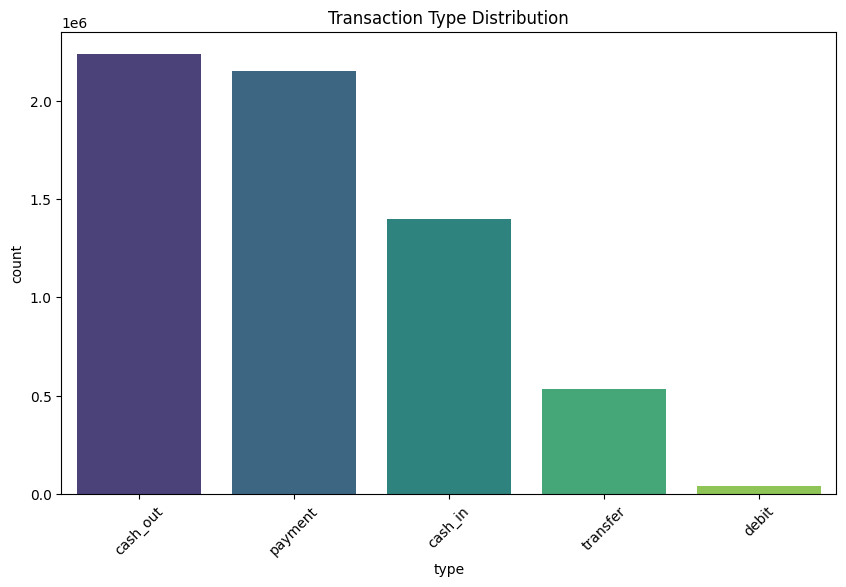

<ipython-input-3-a218f4758b58>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=df, palette='coolwarm')


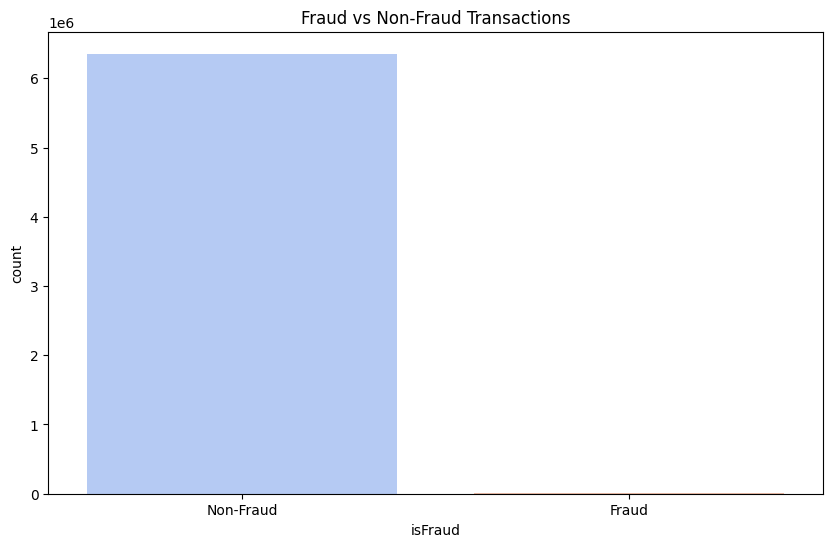

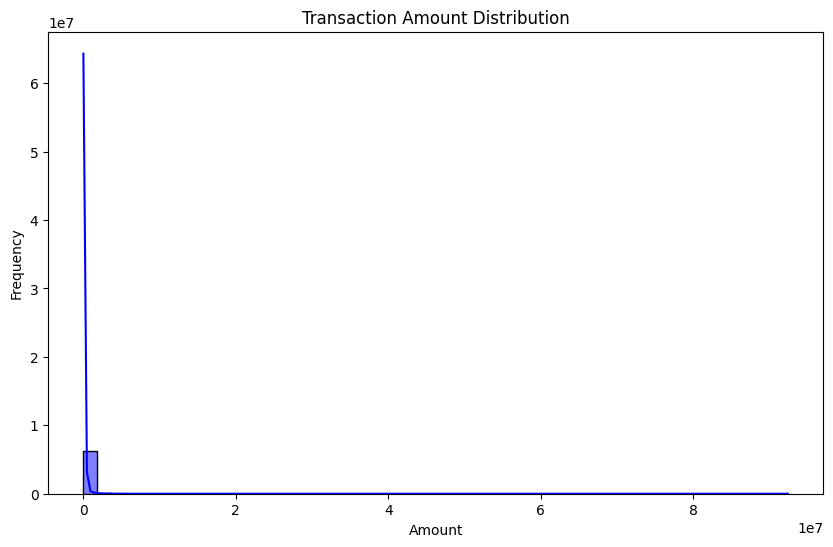

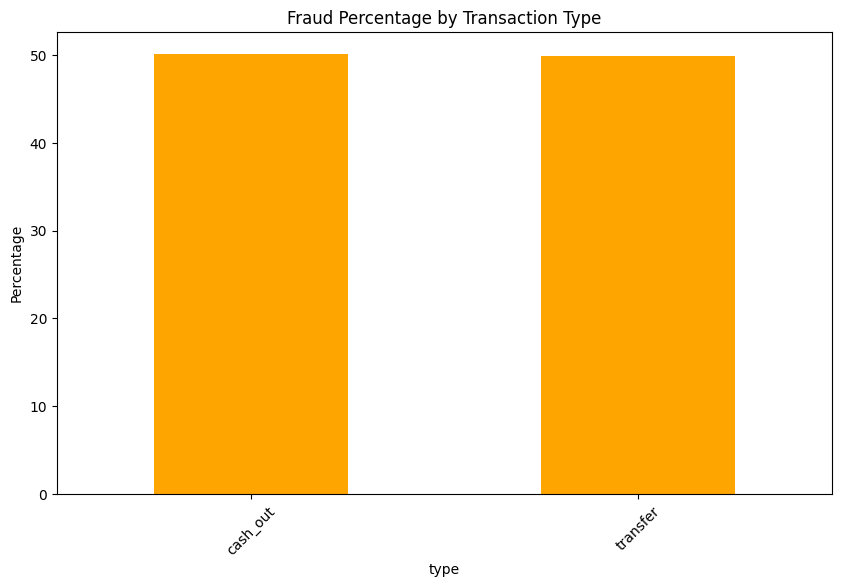

High-value Transactions:
   step      type     amount     nameOrig     nameDest  isFraud  \
0     1  cash_out  229133.94   C905080434   C476402209        0   
1     1  transfer  215310.30  C1670993182  C1100439041        0   
2     1  transfer  311685.89  C1984094095   C932583850        0   
3     1  transfer  224606.64   C873175411   C766572210        0   
4     1  transfer  379856.23  C1449772539  C1590550415        0   

   isFlaggedFraud  
0               0  
1               0  
2               0  
3               0  
4               0  
Fraud Count by Transaction Type:
       type  fraud_count
0  cash_out         4116
1  transfer         4097


<ipython-input-4-b76ee51f8b2b>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='fraud_count', data=fraud_by_type, palette='magma')


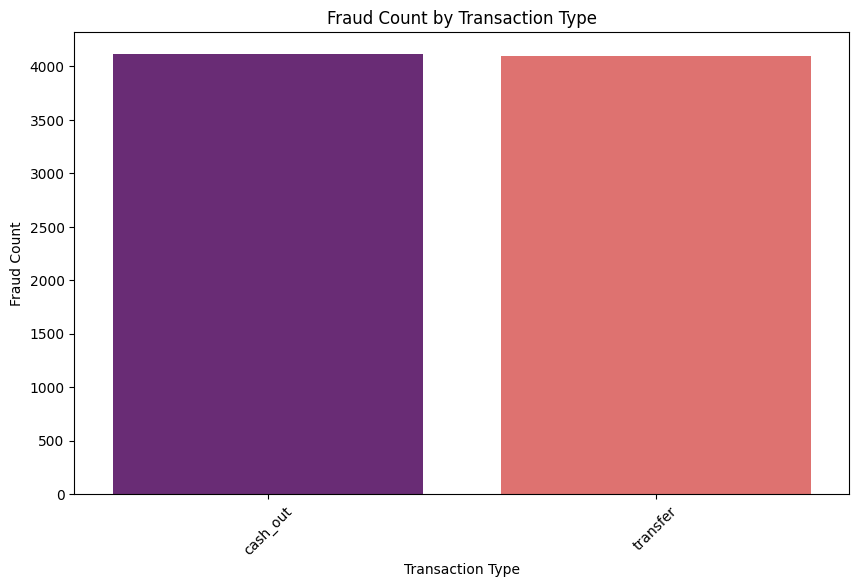

Fraudulent Transactions Sample:
     step      type   amount     nameOrig     nameDest  isFraud  \
2       1  transfer    181.0  C1305486145   C553264065        1   
3       1  cash_out    181.0   C840083671    C38997010        1   
251     1  transfer   2806.0  C1420196421   C972765878        1   
252     1  cash_out   2806.0  C2101527076  C1007251739        1   
680     1  transfer  20128.0   C137533655  C1848415041        1   

     isFlaggedFraud  
2                 0  
3                 0  
251               0  
252               0  
680               0  


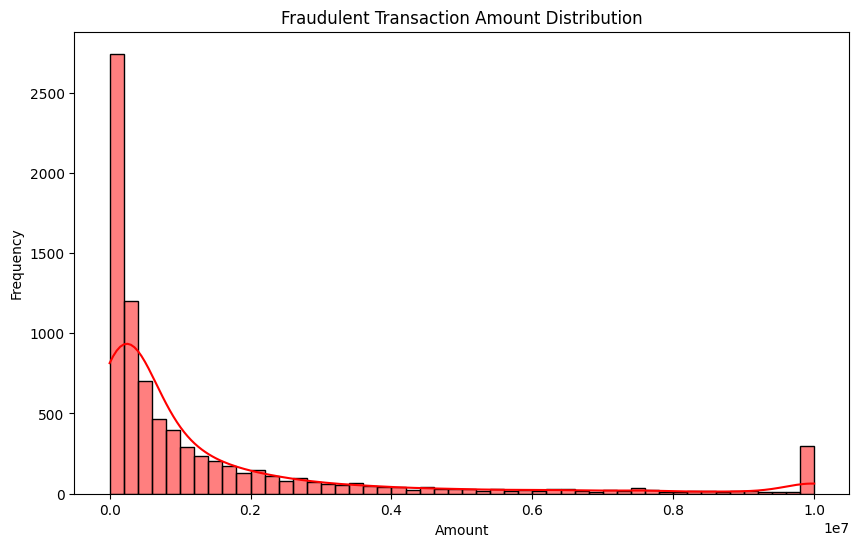

<ipython-input-5-151421c04ae7>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='amount', data=df, palette='Set2')


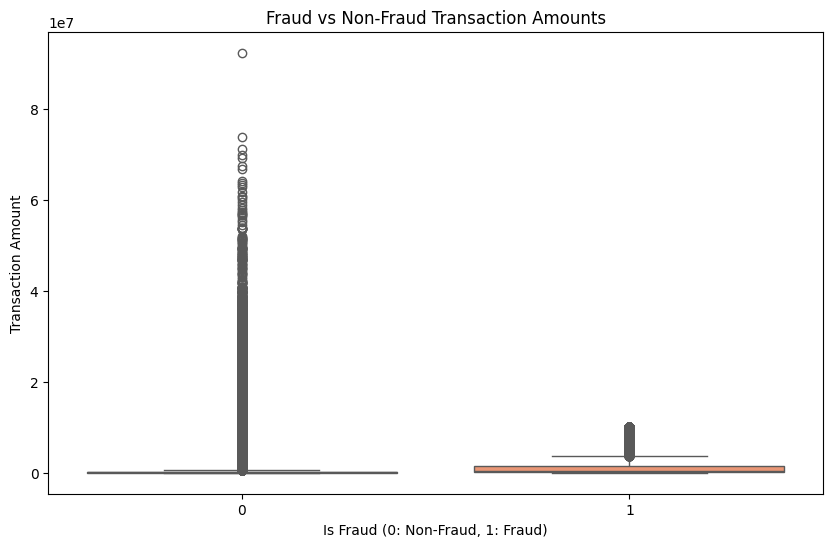

In [6]:

def main():
    df = load_and_clean_data()

    print("Cleaned Data Sample:")
    print(df.head())

    visualize_data(df)
    analyze_data_with_sql(df)
    fraud_analysis(df)

if __name__ == '__main__':
    main()